### Libraries

In [9]:
import pandas as pd

import os

In [20]:
#creating a list to access all the last month sales csv file
files = [file for file in os.listdir("./Sales_Data")]
#converting the list into dataFrame
all_mnt_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_mnt_data = pd.concat([all_mnt_data,df])
all_mnt_data.to_csv("all_data.csv",index = False)   
  

### Reading all_data file which we have merged

In [38]:
all_data = pd.read_csv('all_data.csv')
all_data.head()
nan_data = all_data[all_data.isna().any(axis =1)]
nan_data.head(100)
all_data = all_data.dropna(how='all')
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"
99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001"


### there is 'or' in some of the order_date removing it


In [54]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#### converting each column to int type

In [57]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()`

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### adding new month column

In [81]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months'] = all_data['Months'].astype('int32')


### Adding sales column


In [79]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",3400.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3400.0,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3400.0,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3400.0,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",3400.0,11.99


### what was the best month for sales? how much was earned that month

In [85]:


all_data.groupby('Months').sum(numeric_only=True)



,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


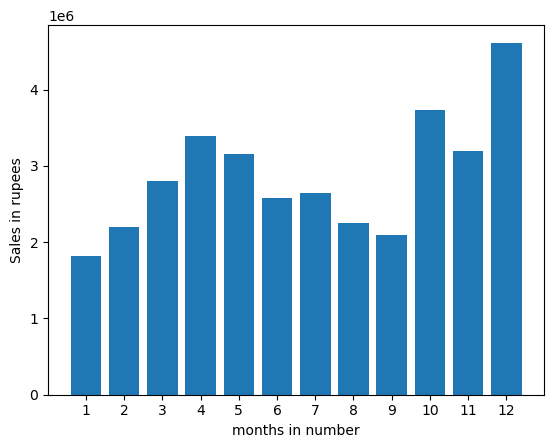

In [121]:
results = all_data.groupby('Months').sum(numeric_only=True)
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in rupees')
plt.xlabel('months in number')

plt.show()

### which city sold the most

#### we have extract the city from purchase address to a new column

In [89]:
def getcity(address):
    return address.split(',')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x : getcity(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [91]:
all_data.groupby('City').sum(numeric_only=True)

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [122]:
result2 = all_data.groupby('City').sum(numeric_only=True)
city_names = pd.Series(all_data['City']).unique()
def getrange(city_names):
    return [(i, city) for i, city in enumerate(city_names)]

x_range = getrange(city_names)

# Unpack the indices and city names for the x-axis ticks
indices, cities = zip(*x_range)

plt.bar(indices, result2['Sales'])
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(indices, cities, rotation=45, ha='right') 
for i, value in enumerate(result2['Sales']):
    plt.text(indices[i], value + 10, str(round(value, 2)), ha='center', va='bottom' color='yellow')# Set x-axis ticks to city names
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3222050352.py, line 17)